In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.7 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.2 MB/s eta 0:00:00:00:0100:01


In [6]:
import os
from pathlib import Path
from sklearn.model_selection import train_test_split

# Source directories
BASE = Path('/kaggle/input/plantvillage-for-object-detection-yolo/PlantVillage_for_object_detection/Dataset')
IMG_SRC = BASE / 'images'
LBL_SRC = BASE / 'labels'

# Output structure
OUT = Path('/kaggle/working/plantvillage_symlinks')
splits = ['train', 'valid']
for split in splits:
    (OUT / split / 'images').mkdir(parents=True, exist_ok=True)
    (OUT / split / 'labels').mkdir(parents=True, exist_ok=True)

# Split the images
all_images = list(IMG_SRC.glob('*.jpg'))
train_imgs, val_imgs = train_test_split(all_images, test_size=0.2, random_state=42)

def symlink_images(image_paths, split):
    for img_path in image_paths:
        label_path = LBL_SRC / f"{img_path.stem}.txt"
        # Create symlinks
        os.symlink(img_path, OUT / split / 'images' / img_path.name)
        os.symlink(label_path, OUT / split / 'labels' / label_path.name)

symlink_images(train_imgs, 'train')
symlink_images(val_imgs, 'valid')


In [8]:
import yaml

class_file = '/kaggle/input/plantvillage-for-object-detection-yolo/PlantVillage_for_object_detection/Dataset/classes.yaml'
with open(class_file, 'r') as f:
    class_info = yaml.safe_load(f)

class_names = class_info['names'] if 'names' in class_info else list(class_info.values())

data_yaml = {
    'train': str(OUT / 'train/images'),
    'val': str(OUT / 'valid/images'),
    'nc': len(class_names),
    'names': class_names
}

with open('plantvillage.yaml', 'w') as f:
    yaml.dump(data_yaml, f)

print(open('plantvillage.yaml').read())


names:
- Apple___Apple_scab
- Apple___Black_rot
- Apple___Cedar_apple_rust
- Apple___healthy
- Blueberry___healthy
- Cherry___Powdery_mildew
- Cherry___healthy
- Corn___Cercospora_leaf_spot Gray_leaf_spot
- Corn___Common_rust
- Corn___Northern_Leaf_Blight
- Corn___healthy
- Grape___Black_rot
- Grape___Esca_(Black_Measles)
- Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
- Grape___healthy
- Orange___Haunglongbing_(Citrus_greening)
- Peach___Bacterial_spot
- Peach___healthy
- Pepper,_bell___Bacterial_spot
- Pepper,_bell___healthy
- Potato___Early_blight
- Potato___Late_blight
- Potato___healthy
- Raspberry___healthy
- Soybean___healthy
- Squash___Powdery_mildew
- Strawberry___Leaf_scorch
- Strawberry___healthy
- Tomato___Bacterial_spot
- Tomato___Early_blight
- Tomato___Late_blight
- Tomato___Leaf_Mold
- Tomato___Septoria_leaf_spot
- Tomato___Spider_mites Two-spotted_spider_mite
- Tomato___Target_Spot
- Tomato___Tomato_Yellow_Leaf_Curl_Virus
- Tomato___Tomato_mosaic_virus
- Tomato___healthy


In [9]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')
model.train(data='plantvillage.yaml', epochs=30, imgsz=640, batch=16)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 86.7MB/s]


Ultralytics 8.3.159 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=plantvillage.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=30, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, prof

100%|██████████| 755k/755k [00:00<00:00, 18.0MB/s]


Overriding model.yaml nc=80 with nc=38

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 76.5MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.4±0.1 ms, read: 41.1±7.6 MB/s, size: 17.7 KB)


train: Scanning /kaggle/working/plantvillage_symlinks/train/labels... 43433 images, 0 backgrounds, 0 corrupt: 100%|██████████| 43433/43433 [00:41<00:00, 1038.83it/s]


train: New cache created: /kaggle/working/plantvillage_symlinks/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.2±0.2 ms, read: 30.1±18.5 MB/s, size: 19.0 KB)


val: Scanning /kaggle/working/plantvillage_symlinks/valid/labels... 10859 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10859/10859 [00:17<00:00, 615.51it/s]


val: New cache created: /kaggle/working/plantvillage_symlinks/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.06G     0.4456      2.283      1.138         26        640: 100%|██████████| 2715/2715 [07:43<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [01:08<00:00,  4.94it/s]


                   all      10859      10870      0.761      0.789      0.851      0.801

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.54G     0.4094      1.157      1.085         26        640: 100%|██████████| 2715/2715 [07:32<00:00,  6.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [01:07<00:00,  5.02it/s]


                   all      10859      10870      0.873      0.886      0.941      0.887

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.56G     0.4286     0.9609      1.091         26        640: 100%|██████████| 2715/2715 [07:26<00:00,  6.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [01:06<00:00,  5.08it/s]


                   all      10859      10870      0.892       0.92      0.969      0.908

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.56G     0.4123     0.7822       1.08         20        640: 100%|██████████| 2715/2715 [07:23<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [01:06<00:00,  5.14it/s]


                   all      10859      10870      0.956      0.945      0.982      0.946

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.58G      0.383      0.643      1.063         23        640: 100%|██████████| 2715/2715 [07:23<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [01:06<00:00,  5.10it/s]


                   all      10859      10870      0.966      0.967      0.988      0.958

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.59G     0.3669     0.5742      1.055         25        640: 100%|██████████| 2715/2715 [07:25<00:00,  6.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [01:06<00:00,  5.12it/s]


                   all      10859      10870       0.97      0.983      0.991      0.967

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30       2.6G     0.3567     0.5306       1.05         30        640: 100%|██████████| 2715/2715 [07:23<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [01:06<00:00,  5.13it/s]


                   all      10859      10870      0.979      0.984      0.991      0.971

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.61G     0.3452     0.4929      1.043         26        640: 100%|██████████| 2715/2715 [07:24<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [01:05<00:00,  5.16it/s]


                   all      10859      10870      0.983      0.986      0.992      0.975

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.62G     0.3388     0.4703      1.039         24        640: 100%|██████████| 2715/2715 [07:23<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [01:05<00:00,  5.19it/s]


                   all      10859      10870      0.983      0.986      0.992      0.978

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.64G     0.3346     0.4502      1.039         21        640: 100%|██████████| 2715/2715 [07:22<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [01:05<00:00,  5.20it/s]


                   all      10859      10870       0.99      0.987      0.993      0.981

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.65G     0.3292     0.4334      1.035         28        640: 100%|██████████| 2715/2715 [07:23<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [01:05<00:00,  5.22it/s]

                   all      10859      10870      0.987      0.989      0.993      0.983



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.65G     0.3257     0.4163      1.032         25        640: 100%|██████████| 2715/2715 [07:22<00:00,  6.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [01:05<00:00,  5.21it/s]


                   all      10859      10870      0.989      0.991      0.993      0.983

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.67G     0.3211     0.4042       1.03         24        640: 100%|██████████| 2715/2715 [07:23<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [01:06<00:00,  5.10it/s]


                   all      10859      10870       0.99      0.992      0.993      0.985

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.68G     0.3168     0.3911      1.027         27        640: 100%|██████████| 2715/2715 [07:26<00:00,  6.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [01:05<00:00,  5.20it/s]


                   all      10859      10870      0.992      0.991      0.994      0.985

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30       2.7G     0.3134     0.3875      1.027         29        640: 100%|██████████| 2715/2715 [07:23<00:00,  6.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [01:06<00:00,  5.08it/s]


                   all      10859      10870      0.991      0.992      0.993      0.985

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30       2.7G     0.3094     0.3722      1.025         26        640: 100%|██████████| 2715/2715 [07:24<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [01:05<00:00,  5.21it/s]

                   all      10859      10870      0.993      0.992      0.994      0.986



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.72G     0.3064     0.3632      1.022         30        640: 100%|██████████| 2715/2715 [07:22<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [01:04<00:00,  5.26it/s]


                   all      10859      10870      0.992      0.993      0.994      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.73G     0.3015     0.3524       1.02         27        640: 100%|██████████| 2715/2715 [07:21<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [01:04<00:00,  5.24it/s]


                   all      10859      10870      0.991      0.993      0.994      0.987

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.74G     0.2986     0.3464      1.018         25        640: 100%|██████████| 2715/2715 [07:24<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [01:05<00:00,  5.23it/s]


                   all      10859      10870      0.994      0.991      0.994      0.988

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.74G     0.2964     0.3329      1.018         20        640: 100%|██████████| 2715/2715 [07:24<00:00,  6.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [01:05<00:00,  5.20it/s]


                   all      10859      10870      0.995       0.99      0.994      0.988
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.76G     0.1291     0.1712     0.9275          9        640: 100%|██████████| 2715/2715 [07:20<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [01:05<00:00,  5.22it/s]


                   all      10859      10870      0.994      0.991      0.994      0.989

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.77G     0.1197     0.1534     0.9214          9        640: 100%|██████████| 2715/2715 [07:19<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [01:06<00:00,  5.15it/s]


                   all      10859      10870      0.994      0.991      0.994      0.989

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.79G     0.1138     0.1412     0.9186          9        640: 100%|██████████| 2715/2715 [07:19<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [01:07<00:00,  5.06it/s]

                   all      10859      10870      0.994      0.992      0.994       0.99



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.79G     0.1093     0.1296     0.9158          9        640: 100%|██████████| 2715/2715 [07:22<00:00,  6.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [01:05<00:00,  5.22it/s]


                   all      10859      10870      0.995      0.992      0.994       0.99

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.81G     0.1056     0.1227     0.9147          9        640: 100%|██████████| 2715/2715 [07:18<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [01:04<00:00,  5.25it/s]


                   all      10859      10870      0.995      0.992      0.994       0.99

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.82G     0.1035     0.1141     0.9122          9        640: 100%|██████████| 2715/2715 [07:19<00:00,  6.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [01:04<00:00,  5.26it/s]

                   all      10859      10870      0.995      0.992      0.994      0.991



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.83G     0.1002     0.1048     0.9108          9        640: 100%|██████████| 2715/2715 [07:19<00:00,  6.17it/s]
      28/30      2.83G        inf    0.09652     0.9078          9        640: 100%|██████████| 2715/2715 [07:21<00:00,  6.14it/s]5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [01:06<00:00,  5.13it/s]


                   all      10859      10870      0.995      0.993      0.994      0.991

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.85G    0.09294    0.09024     0.9066          9        640: 100%|██████████| 2715/2715 [07:18<00:00,  6.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [01:05<00:00,  5.16it/s]


                   all      10859      10870      0.995      0.993      0.994      0.991

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.87G    0.08952     0.0823     0.9044          9        640: 100%|██████████| 2715/2715 [07:19<00:00,  6.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [01:06<00:00,  5.15it/s]


                   all      10859      10870      0.995      0.993      0.994      0.991

30 epochs completed in 4.249 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,013,058 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 340/340 [01:03<00:00,  5.33it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all      10859      10870      0.995      0.993      0.994      0.991
    Apple___Apple_scab        135        135      0.991          1      0.995       0.99
     Apple___Black_rot        127        127      0.997          1      0.995      0.995
Apple___Cedar_apple_rust         71         71      0.997          1      0.995      0.993
       Apple___healthy        274        274          1      0.996      0.995      0.993
   Blueberry___healthy        293        293      0.999          1      0.995      0.995
Cherry___Powdery_mildew        200        200      0.999          1      0.995      0.995
      Cherry___healthy        194        194      0.999      0.995      0.995      0.995
Corn___Cercospora_leaf_spot Gray_leaf_spot        101        103      0.958      0.891      0.961       0.94
    Corn___Common_rust        246        246      0.996          1      0.995      0.994
Corn___Northern_Leaf_Blight        190        192      0.976      0.953      0.985     

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7ce5a15a0c50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,  

In [11]:
!zip -r /kaggle/working/yolo8_train_outputs.zip /kaggle/working/runs/detect/train


  adding: kaggle/working/runs/detect/train/ (stored 0%)
  adding: kaggle/working/runs/detect/train/F1_curve.png (deflated 15%)
  adding: kaggle/working/runs/detect/train/labels_correlogram.jpg (deflated 43%)
  adding: kaggle/working/runs/detect/train/confusion_matrix.png (deflated 15%)
  adding: kaggle/working/runs/detect/train/weights/ (stored 0%)
  adding: kaggle/working/runs/detect/train/weights/last.pt (deflated 9%)
  adding: kaggle/working/runs/detect/train/weights/best.pt (deflated 9%)
  adding: kaggle/working/runs/detect/train/val_batch1_labels.jpg (deflated 6%)
  adding: kaggle/working/runs/detect/train/labels.jpg (deflated 53%)
  adding: kaggle/working/runs/detect/train/val_batch1_pred.jpg (deflated 6%)
  adding: kaggle/working/runs/detect/train/train_batch54301.jpg (deflated 6%)
  adding: kaggle/working/runs/detect/train/train_batch54302.jpg (deflated 6%)
  adding: kaggle/working/runs/detect/train/train_batch2.jpg (deflated 3%)
  adding: kaggle/working/runs/detect/train/val_b

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load training results
results_path = "/kaggle/working/runs/detect/train/results.csv"
df = pd.read_csv(results_path)

# Display first few rows
df.head()

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,533.079,0.44565,2.28346,1.13801,0.76083,0.78872,0.85052,0.80097,0.32720,0.77674,0.94108,0.003332,0.003332,0.003332
1,2,1054.000,0.40937,1.15656,1.08544,0.87280,0.88610,0.94140,0.88739,0.34323,0.61150,0.94635,0.006445,0.006445,0.006445
2,3,1567.760,0.42855,0.96090,1.09064,0.89201,0.92039,0.96896,0.90776,0.34620,0.49166,0.95683,0.009339,0.009339,0.009339
3,4,2077.310,0.41230,0.78219,1.08016,0.95559,0.94509,0.98238,0.94609,0.28663,0.32786,0.88351,0.009010,0.009010,0.009010
4,5,2588.060,0.38298,0.64297,1.06303,0.96581,0.96679,0.98781,0.95835,0.25813,0.27862,0.84326,0.008680,0.008680,0.008680


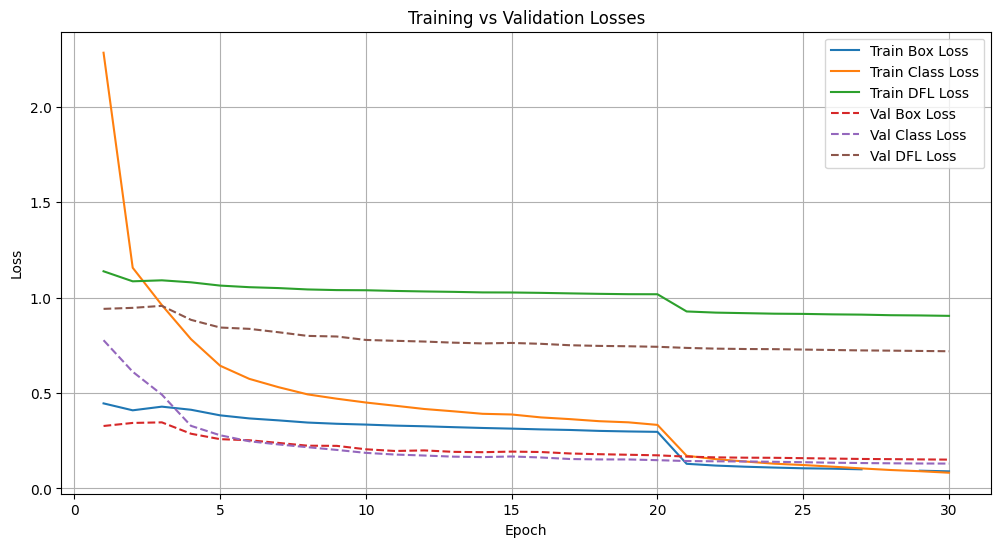

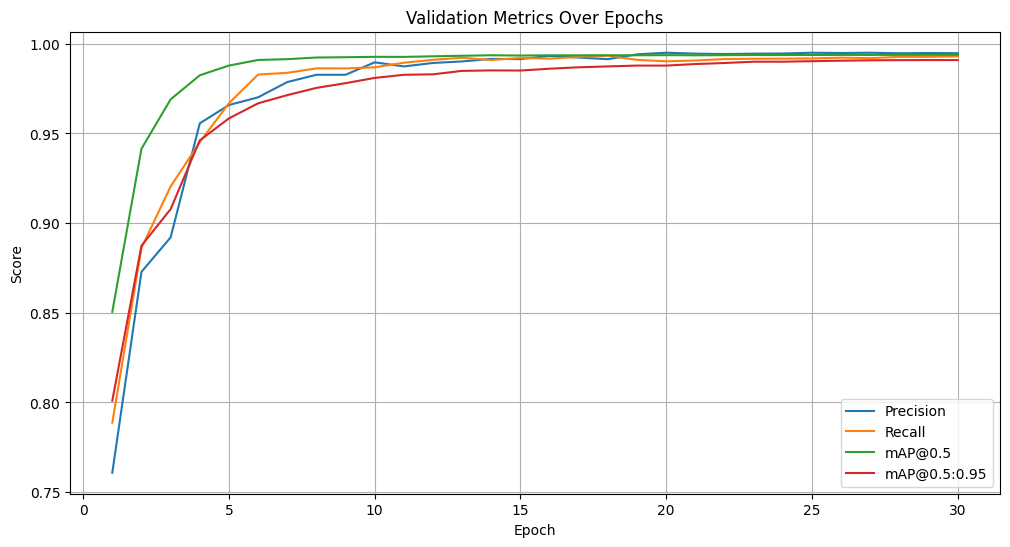

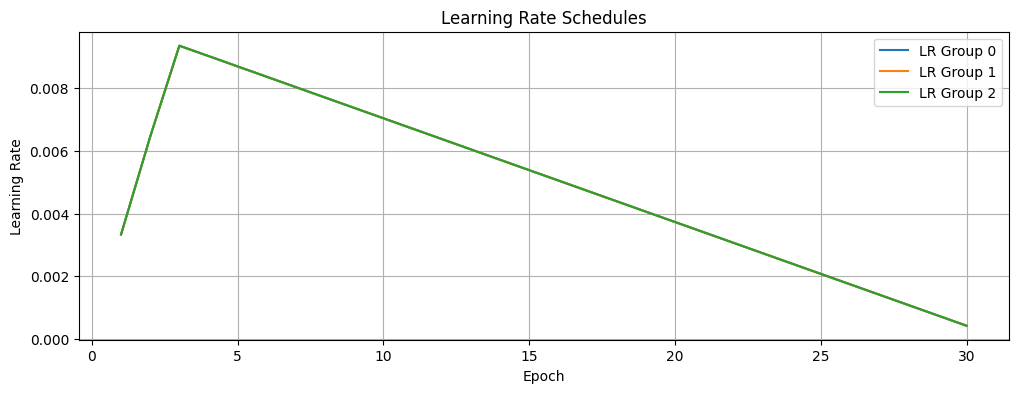

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and clean
df = pd.read_csv("/kaggle/working/runs/detect/train/results.csv")
df.columns = df.columns.str.strip()  # remove extra spaces just in case

# Plot training and validation losses
plt.figure(figsize=(12, 6))
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['train/cls_loss'], label='Train Class Loss')
plt.plot(df['epoch'], df['train/dfl_loss'], label='Train DFL Loss')
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss', linestyle='--')
plt.plot(df['epoch'], df['val/cls_loss'], label='Val Class Loss', linestyle='--')
plt.plot(df['epoch'], df['val/dfl_loss'], label='Val DFL Loss', linestyle='--')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Losses')
plt.legend()
plt.grid(True)
plt.show()

# Plot Precision, Recall, mAP
plt.figure(figsize=(12, 6))
plt.plot(df['epoch'], df['metrics/precision(B)'], label='Precision')
plt.plot(df['epoch'], df['metrics/recall(B)'], label='Recall')
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@0.5')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95')
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.title('Validation Metrics Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plot Learning Rates (Optional)
plt.figure(figsize=(12, 4))
plt.plot(df['epoch'], df['lr/pg0'], label='LR Group 0')
plt.plot(df['epoch'], df['lr/pg1'], label='LR Group 1')
plt.plot(df['epoch'], df['lr/pg2'], label='LR Group 2')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.title('Learning Rate Schedules')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("/kaggle/working/runs/detect/train/weights/best.pt")


In [18]:
import os

# See what's inside the images folder
images_dir = "/kaggle/input/plantvillage-for-object-detection-yolo/PlantVillage_for_object_detection/Dataset/images"

# List first 5 images
files = os.listdir(images_dir)
print("Sample image files:", files[:5])


Sample image files: ['GRES_image (936).jpg', 'ORHL_image (3310).jpg', 'ORHL_image (4812).jpg', 'PTLB_image (992).jpg', 'PCBS_image (1397).jpg']


In [19]:
image_path = f"{images_dir}/{files[0]}"  # or any valid filename from above
results = model.predict(source=image_path, conf=0.25, save=True)



image 1/1 /kaggle/input/plantvillage-for-object-detection-yolo/PlantVillage_for_object_detection/Dataset/images/GRES_image (936).jpg: 640x640 1 Grape___Esca_(Black_Measles), 7.6ms
Speed: 2.8ms preprocess, 7.6ms inference, 3.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


In [22]:
!zip -r /kaggle/working/yolo_predictions.zip /kaggle/working/runs/detect/predict


  adding: kaggle/working/runs/detect/predict/ (stored 0%)
  adding: kaggle/working/runs/detect/predict/APBR_image (87).jpg (deflated 6%)
  adding: kaggle/working/runs/detect/predict/BLHE_image (1430).jpg (deflated 6%)
  adding: kaggle/working/runs/detect/predict/APHE_image (620).jpg (deflated 7%)
  adding: kaggle/working/runs/detect/predict/APHE_image (1000).jpg (deflated 5%)
  adding: kaggle/working/runs/detect/predict/APHE_image (271).jpg (deflated 4%)
  adding: kaggle/working/runs/detect/predict/BLHE_image (332).jpg (deflated 6%)
  adding: kaggle/working/runs/detect/predict/BLHE_image (345).jpg (deflated 7%)
  adding: kaggle/working/runs/detect/predict/APHE_image (1053).jpg (deflated 6%)
  adding: kaggle/working/runs/detect/predict/APHE_image (1427).jpg (deflated 5%)
  adding: kaggle/working/runs/detect/predict/APHE_image (1181).jpg (deflated 6%)
  adding: kaggle/working/runs/detect/predict/BLHE_image (1261).jpg (deflated 6%)
  adding: kaggle/working/runs/detect/predict/APHE_image (

In [23]:
metrics = model.val()
print(metrics)


Ultralytics 8.3.159 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 35.7±7.7 MB/s, size: 16.3 KB)


val: Scanning /kaggle/working/plantvillage_symlinks/valid/labels.cache... 10859 images, 0 backgrounds, 0 corrupt: 100%|██████████| 10859/10859 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 679/679 [01:19<00:00,  8.52it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all      10859      10870      0.995      0.993      0.994      0.991
    Apple___Apple_scab        135        135      0.991          1      0.995       0.99
     Apple___Black_rot        127        127      0.997          1      0.995      0.995
Apple___Cedar_apple_rust         71         71      0.997          1      0.995      0.993
       Apple___healthy        274        274          1      0.996      0.995      0.994
   Blueberry___healthy        293        293      0.999          1      0.995      0.995
Cherry___Powdery_mildew        200        200      0.999          1      0.995      0.995
      Cherry___healthy        194        194      0.999      0.995      0.995      0.995
Corn___Cercospora_leaf_spot Gray_leaf_spot        101        103      0.958      0.891      0.961      0.942
    Corn___Common_rust        246        246      0.996          1      0.995      0.994
Corn___Northern_Leaf_Blight        190        192      0.975      0.953      0.985     